In [846]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [847]:
import numpy as np
import pandas as pd

In [848]:
BoomBikes = pd.read_csv("day.csv")

In [849]:
BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspect the BoomBikes dataframe

In [850]:
BoomBikes.shape

(730, 16)

In [851]:
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [852]:
BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising Data, Performing EDA and making few basic plots

In [853]:
import matplotlib.pyplot as plt
import seaborn as sns

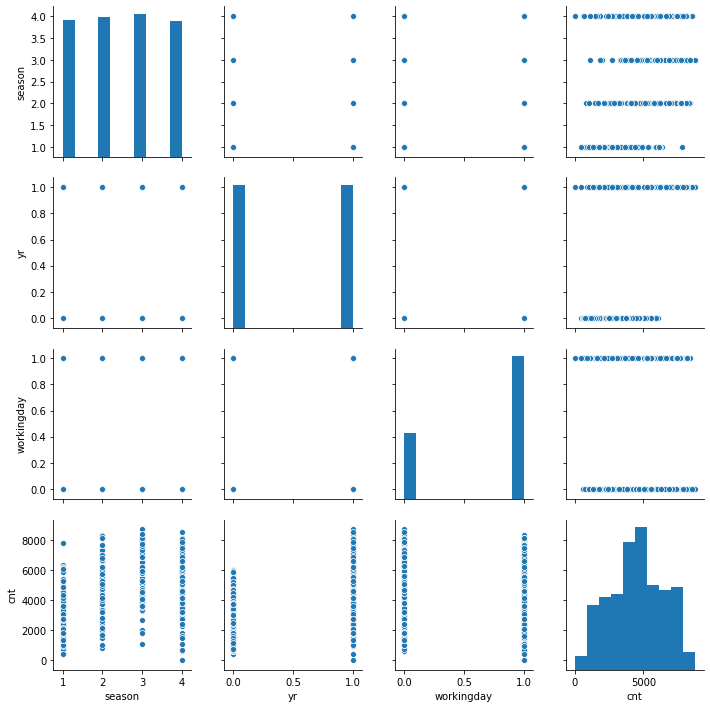

In [854]:
sns.pairplot(data=BoomBikes, vars=["season", "yr", "workingday", "cnt"])
plt.show()

#### Inferences from about pairplot - 
#### Year 2018 has less number of count in bike rentals compared to 2019.
#### Count of bike rentals over all are higher on working day are lesser compared to weekend/holiday.
#### Season that records highest number of bike rentals are:
#####    Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#####   Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#####   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#####   Clear, Few clouds, Partly cloudy, Partly cloudy

In [855]:
BoomBikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dataset looks good with no nulls

### Heading -  Understanding data and making inferences.

In [856]:
BoomBikes.groupby(['weekday'])['cnt'].mean()

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4574.893204
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

#### 4th & 5th days recorded relatively high number of rental bookings

In [857]:
BoomBikes.groupby(['yr'])['cnt'].mean()

yr
0    3405.761644
1    5610.252055
Name: cnt, dtype: float64

#### 2019 has higher count of total rental bikes compared to 2018

In [858]:
BoomBikes.groupby(['yr'])['registered'].mean()

yr
0    2728.358904
1    4589.156164
Name: registered, dtype: float64

#### 2019 has higher number of "Registered" rental bike bookings

In [859]:
BoomBikes.groupby(['yr'])['casual'].mean()

yr
0     677.40274
1    1021.09589
Name: casual, dtype: float64

#### Similarly 2019 again had higher number of "Casual" rental bike bookings compared to 2018

In [860]:
BoomBikes.groupby(['workingday'])['cnt'].mean()

workingday
0    4330.168831
1    4590.332665
Name: cnt, dtype: float64

#### Working day/ non holiday had better count of rental bookings than weekend.

In [861]:
BoomBikes.groupby(['workingday'])['registered'].mean()

workingday
0    2959.034632
1    3982.677355
Name: registered, dtype: float64

#### On a working day,  registered users are predominently seen to book bike rental. 

In [862]:
BoomBikes.groupby(['workingday'])['casual'].mean()

workingday
0    1371.134199
1     607.655311
Name: casual, dtype: float64

#### There's the catch. On a weekend/holiday users are preferring casual booking of bike rental instead than on a working day. Or on a working day, casual bookings are less prefered. Instead casual bookings are more prefered on rental bikes on a weekend/holiday

In [863]:
BoomBikes.groupby(['season'])['cnt'].mean()

season
1    2608.411111
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

#### Alright, fall sees high number of bike rental counts followed by summer. Spring offers less count in bike rentals

In [864]:
BoomBikes.groupby(['holiday'])['cnt'].mean()

holiday
0    4530.90268
1    3735.00000
Name: cnt, dtype: float64

#### More bike rentals seen on working day rather than holiday

In [865]:
BoomBikes.groupby(['mnth'])['cnt'].mean()

mnth
1     2176.338710
2     2669.964286
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

#### Now.. September, June, August, July are top 4 months that see more number of counts in bike rentals

In [866]:
BoomBikes.groupby(['weathersit'])['cnt'].mean()

weathersit
1    4876.786177
2    4044.813008
3    1803.285714
Name: cnt, dtype: float64

#### There are no rows seens for weathersit '4'. More number of bookings seen when weather is clear, partly cloudy

## Finding co-relation between variables

In [867]:
corr_matrix = BoomBikes[['season', 'holiday', 'weekday','workingday', 'mnth', 'weathersit', 'temp', 'cnt', 'casual', 'registered']].corr()
corr_matrix

,season,holiday,weekday,workingday,mnth,weathersit,temp,cnt,casual,registered
season,1.000000,-0.010868,-0.003081,0.013762,0.831032,0.021306,0.333361,0.404584,0.208737,0.410310
holiday,-0.010868,1.000000,-0.101962,-0.252948,0.018905,-0.034395,-0.028764,-0.068764,0.054055,-0.109142
weekday,-0.003081,-0.101962,1.000000,0.035800,0.009523,0.031112,-0.000168,0.067534,0.059978,0.057427
workingday,0.013762,-0.252948,0.035800,1.000000,-0.004688,0.060236,0.053470,0.062542,-0.517607,0.305437
mnth,0.831032,0.018905,0.009523,-0.004688,1.000000,0.045613,0.219083,0.278191,0.121208,0.291952
weathersit,0.021306,-0.034395,0.031112,0.060236,0.045613,1.000000,-0.119503,-0.295929,-0.246044,-0.259025
temp,0.333361,-0.028764,-0.000168,0.053470,0.219083,-0.119503,1.000000,0.627044,0.542731,0.539436
cnt,0.404584,-0.068764,0.067534,0.062542,0.278191,-0.295929,0.627044,1.000000,0.672123,0.945411
casual,0.208737,0.054055,0.059978,-0.517607,0.121208,-0.246044,0.542731,0.672123,1.000000,0.394137
registered,0.410310,-0.109142,0.057427,0.305437,0.291952,-0.259025,0.539436,0.945411,0.394137,1.000000


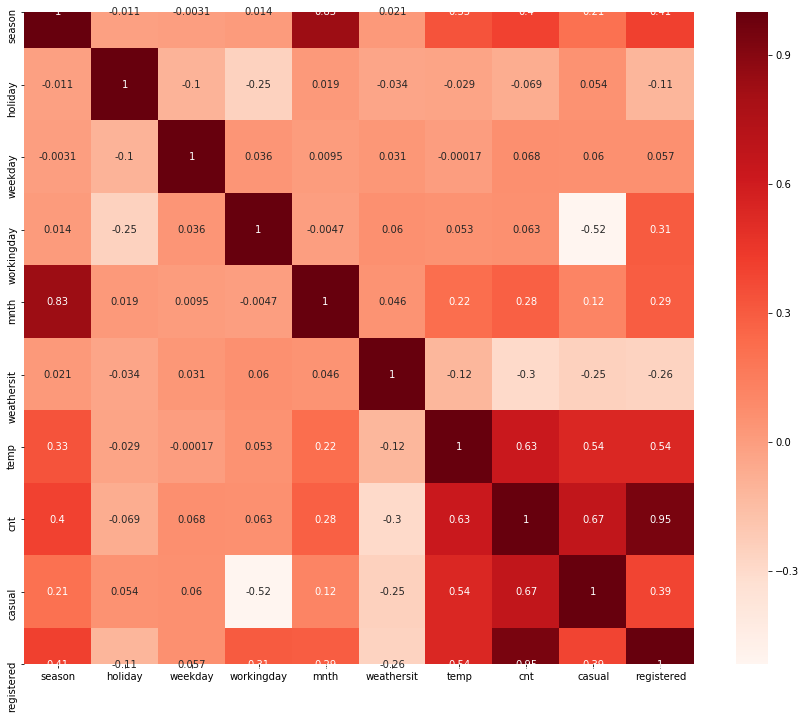

In [868]:
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, annot = True, cmap="Reds")
plt.show()

##### Temperature and Cnt have good co-relation
##### Season less equally is showing co-relation with Cnt variable
##### Working day shows good negative co-relation on casual bike rentals, while has positive considerable co-relation on registered bike rentals
##### weather and cnt are well co-related

In [869]:
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)).unstack().reset_index()
corrdf.columns = ['VAR1','VAR2','Correlation']
corrdf.sort_values('Correlation', ascending = False)

,VAR1,VAR2,Correlation
97,registered,cnt,0.945411
40,mnth,season,0.831032
87,casual,cnt,0.672123
76,cnt,temp,0.627044
86,casual,temp,0.542731
...,...,...,...
78,cnt,casual,NaN
79,cnt,registered,NaN
88,casual,casual,NaN
89,casual,registered,NaN


### Plots using data, univariate and multivariate analysis

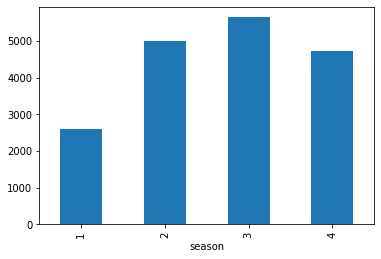

In [870]:
BoomBikes.groupby(['season'])['cnt'].mean().plot.bar()
plt.show()

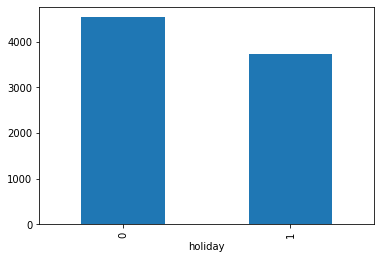

In [871]:
BoomBikes.groupby(['holiday'])['cnt'].mean().plot.bar()
plt.show()

#### Non Holidays have more count in number of bike rentals

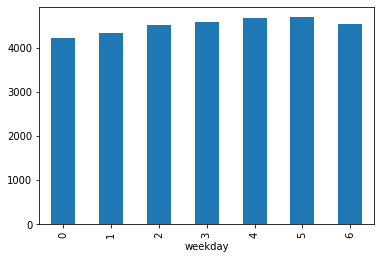

In [872]:
BoomBikes.groupby(['weekday'])['cnt'].mean().plot.bar()
plt.show()

#### Day 5 and 4 have better number in count of bike rentals

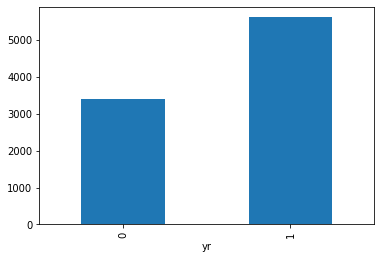

In [873]:
BoomBikes.groupby(['yr'])['cnt'].mean().plot.bar()
plt.show()

#### Clearly 2019 had more number of count in bike rentals

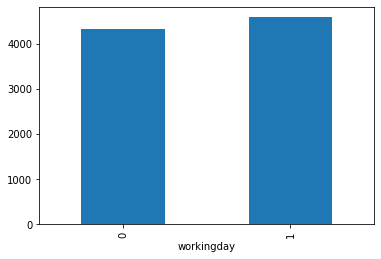

In [874]:
BoomBikes.groupby(['workingday'])['cnt'].mean().plot.bar()
plt.show()

#### Workinday has high demand for bike rentals compared to holiday

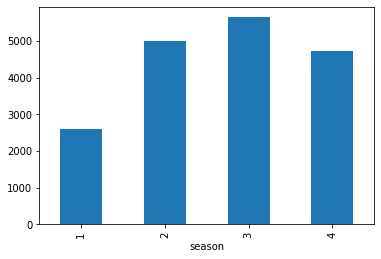

In [875]:
BoomBikes.groupby(['season'])['cnt'].mean().plot.bar()
plt.show()

#### Fall, Summer got high number of bike rentals demand

## Multi-Collinearity

In [876]:
corr_matrix = BoomBikes[['season', 'yr', 'atemp', 'hum', 'windspeed', 'holiday', 'weekday','workingday', 'mnth', 'weathersit', 'temp', 'cnt', 'casual', 'registered']].corr()
corr_matrix

,season,yr,atemp,hum,windspeed,holiday,weekday,workingday,mnth,weathersit,temp,cnt,casual,registered
season,1.000000e+00,-2.248195e-17,0.342014,0.208220,-0.229607,-0.010868,-0.003081,0.013762,8.310321e-01,0.021306,0.333361,0.404584,0.208737,0.410310
yr,-2.248195e-17,1.000000e+00,0.047215,-0.112547,-0.011624,0.008195,-0.005466,-0.002945,-2.470170e-17,-0.050322,0.048789,0.569728,0.250502,0.596911
atemp,3.420139e-01,4.721519e-02,1.000000,0.141512,-0.183876,-0.032703,-0.007539,0.052940,2.264302e-01,-0.120559,0.991696,0.630685,0.543362,0.543678
hum,2.082196e-01,-1.125471e-01,0.141512,1.000000,-0.248506,-0.015662,-0.052290,0.023202,2.249368e-01,0.590277,0.128565,-0.098543,-0.075211,-0.089212
windspeed,-2.296069e-01,-1.162435e-02,-0.183876,-0.248506,1.000000,0.006257,0.014283,-0.018666,-2.080131e-01,0.039769,-0.158186,-0.235132,-0.167995,-0.217914
holiday,-1.086804e-02,8.195345e-03,-0.032703,-0.015662,0.006257,1.000000,-0.101962,-0.252948,1.890483e-02,-0.034395,-0.028764,-0.068764,0.054055,-0.109142
weekday,-3.081198e-03,-5.466369e-03,-0.007539,-0.052290,0.014283,-0.101962,1.000000,0.035800,9.522969e-03,0.031112,-0.000168,0.067534,0.059978,0.057427
workingday,1.376178e-02,-2.945396e-03,0.052940,0.023202,-0.018666,-0.252948,0.035800,1.000000,-4.687953e-03,0.060236,0.053470,0.062542,-0.517607,0.305437
mnth,8.310321e-01,-2.470170e-17,0.226430,0.224937,-0.208013,0.018905,0.009523,-0.004688,1.000000e+00,0.045613,0.219083,0.278191,0.121208,0.291952
weathersit,2.130636e-02,-5.032247e-02,-0.120559,0.590277,0.039769,-0.034395,0.031112,0.060236,4.561335e-02,1.000000,-0.119503,-0.295929,-0.246044,-0.259025


In [877]:
corr1df = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)).unstack().reset_index()
corr1df.columns = ['VAR1','VAR2','Correlation']
corr1df.sort_values('Correlation', ascending = False)

,VAR1,VAR2,Correlation
142,temp,atemp,0.991696
193,registered,cnt,0.945411
112,mnth,season,0.831032
179,casual,cnt,0.672123
156,cnt,atemp,0.630685
...,...,...,...
166,cnt,casual,NaN
167,cnt,registered,NaN
180,casual,casual,NaN
181,casual,registered,NaN


In [878]:
### Top 5 Co_relations- 
#### 1. Temp vs atemp
#### 2. registered vs cnt
#### 3. month vs season
#### 4. casual vs count
#### 5. cnt vs atemp

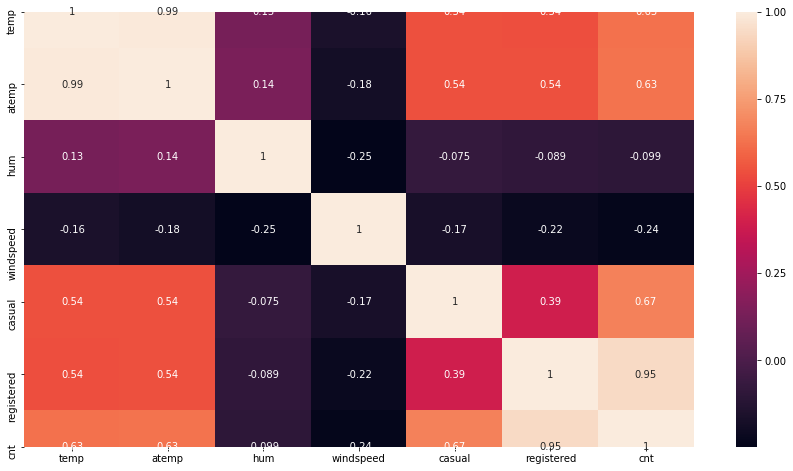

In [879]:
numerics = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
plt.figure(figsize=(15,8))
sns.heatmap(BoomBikes[numerics].corr(), annot = True)
plt.show()

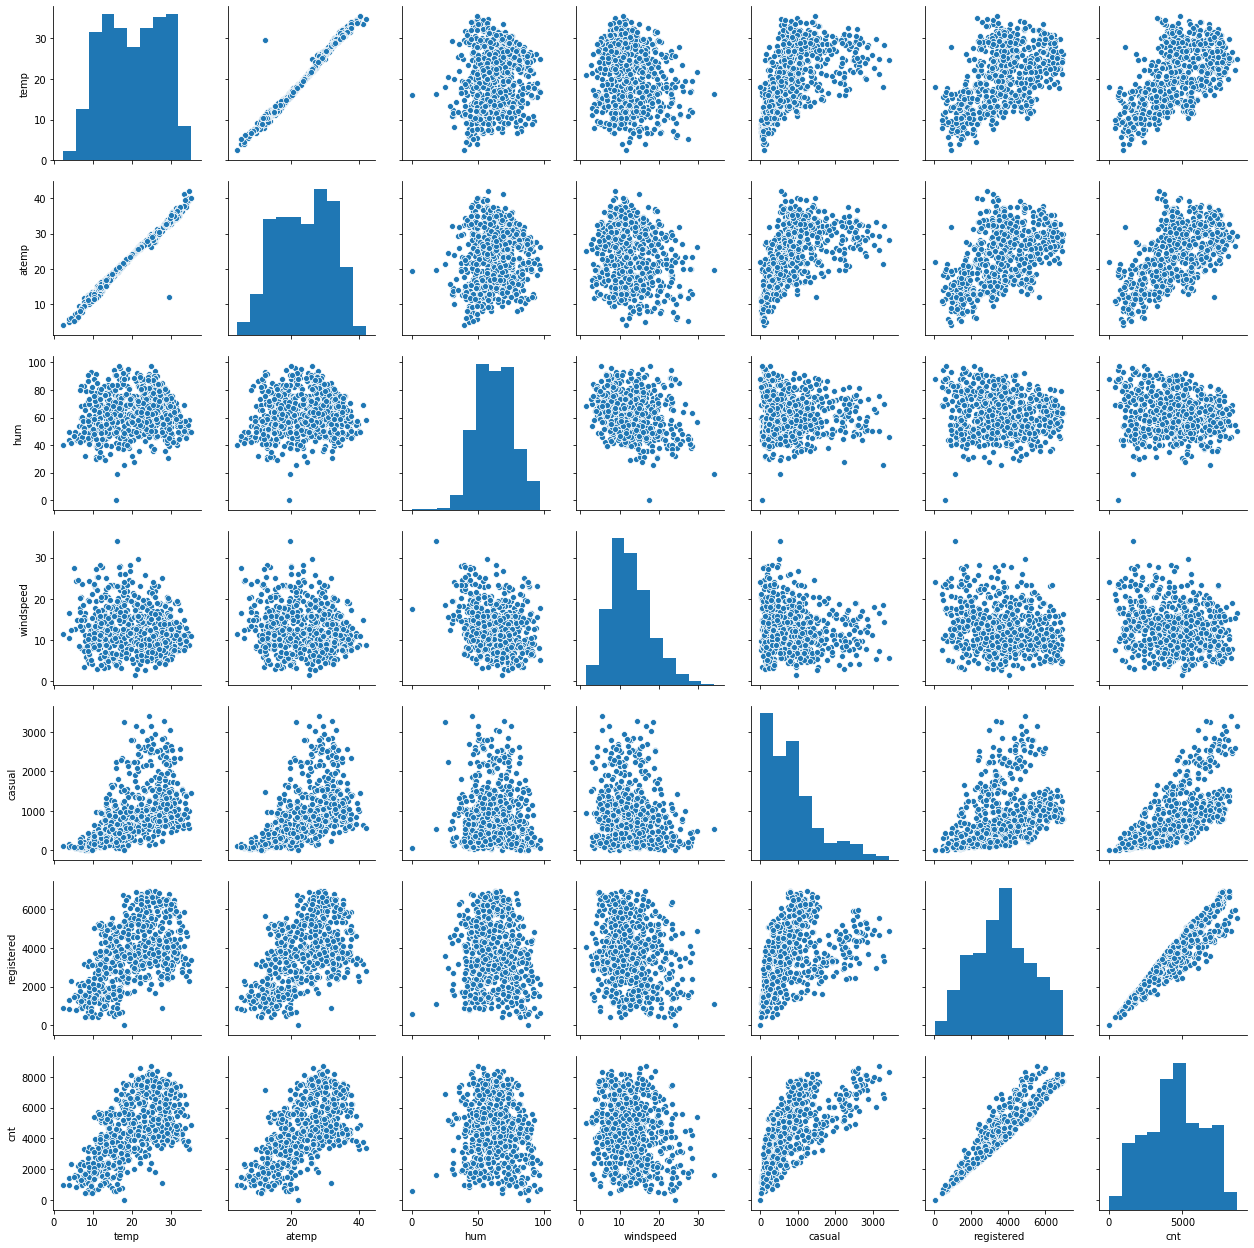

In [880]:
sns.pairplot(BoomBikes[numerics])
plt.show()

In [881]:
### Inference from above plot: (Not considering resgistered and casual variables in this co-relation analysis as they will be removed)
# temp and atemp- 0.99
# atemp vs cnt - 0.63
# temp vs cnt - 0.63

## Data Preparation:
### Converting Categorical variables to Object type, Dummying variables.
### Dropping invalid variables

In [882]:
BoomBikes.info()
BoomBikes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [883]:
# dropping the invalid or insignificant columns from dataset
BoomBikes = BoomBikes.drop(columns  = ['instant', 'dteday', 'casual', 'registered'])
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [884]:
# converting the categorical variables into object type to apply the get dummy function.
BoomBikes['season'] = BoomBikes['season'].astype('object')
BoomBikes['mnth'] = BoomBikes['mnth'].astype('object')
BoomBikes['weekday'] = BoomBikes['weekday'].astype('object')
BoomBikes['weathersit'] = BoomBikes['weathersit'].astype('object')

##### Creating Dummy variables

In [885]:
# creating dummy variables for each of the categorical variables
season = pd.get_dummies(BoomBikes.season, drop_first = True, prefix = 'season')
mnth = pd.get_dummies(BoomBikes.mnth, drop_first = True, prefix = 'mnth')
weekday = pd.get_dummies(BoomBikes.weekday, drop_first = True, prefix = 'weekday')
weathersit = pd.get_dummies(BoomBikes.weathersit, drop_first = True, prefix = 'weathersit')

##### Concatenating with Parent Dataset

In [886]:
BoomBikes = pd.concat([BoomBikes, season, mnth, weekday, weathersit], axis = 1)
BoomBikes = BoomBikes.drop(columns = ['season', 'mnth', 'weekday', 'weathersit'])
BoomBikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## Building Data Model.
### Split Dataset, Scaling dataset.
### Performing RFE model

In [887]:
# Splitting
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BoomBikes, train_size = 0.7, random_state = 100)

In [888]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Scaling on Train Dataset

In [889]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
###
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
##
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
#
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


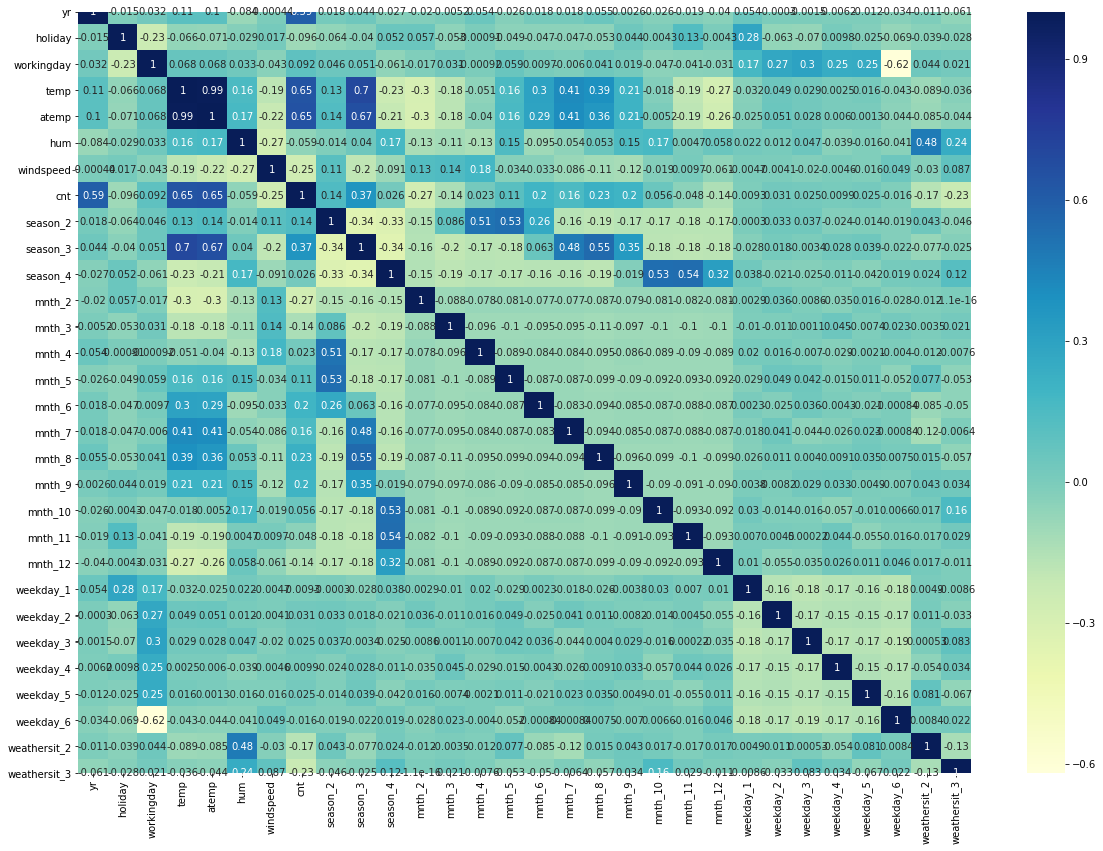

In [890]:
plt.figure(figsize = (20, 14))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Diving into X Train and Y Train sets

In [891]:
y_train = df_train.pop('cnt')
X_train = df_train

In [892]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Executing RFE

In [893]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)              
rfe = rfe.fit(X_train, y_train)

In [894]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [895]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [896]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [897]:
X_train_rfe = X_train[col]

In [898]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_mod1 = sm.add_constant(X_train_rfe)

In [899]:
lm = sm.OLS(y_train,X_train_mod1).fit() 

In [900]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          5.17e-191
Time:                        23:55:31   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790   

In [901]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.91


### Model looks pretty good with 84% RFE. But few variables highly collinear and few insignificant. Let's start correcting the model to attain the best model.

#### Dropping the first insignificant column "season_3" and re-building the model

In [902]:
X_train_rfe2 = X_train_rfe.drop(["season_3"], axis = 1)

In [903]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_mod2 = sm.add_constant(X_train_rfe2)

In [904]:
lm = sm.OLS(y_train,X_train_mod2).fit() 

In [905]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          8.70e-192
Time:                        23:55:32   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

In [906]:
vif = pd.DataFrame()
X = X_train_rfe2 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,season_4,2.25
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.84
10,mnth_10,1.61


#### Model looks pretty much good, except for 'HUM having high VIF and holiday , month_10 being insignificant. Let's rebuild model once again after removing them.

In [907]:
X_train_rfe3 = X_train_rfe2.drop(["holiday"], axis = 1)

In [908]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_mod3 = sm.add_constant(X_train_rfe3)

In [909]:
lm = sm.OLS(y_train,X_train_mod3).fit() 

In [910]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          4.92e-192
Time:                        23:55:32   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1850      0.028      6.497   

In [911]:
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.06
2,temp,10.01
1,workingday,4.56
4,windspeed,3.76
6,season_4,2.25
11,weathersit_2,2.13
0,yr,2.03
5,season_2,1.83
10,weekday_6,1.79
7,mnth_8,1.60


#### Dropping month_10 from model and re-running the LM

In [912]:
X_train_rfe4 = X_train_rfe3.drop(["mnth_10"], axis = 1)

In [913]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_mod4 = sm.add_constant(X_train_rfe4)

In [914]:
lm = sm.OLS(y_train,X_train_mod4).fit() 

In [915]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          4.37e-192
Time:                        23:55:33   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1780      0.028      6.260   

In [916]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.03
2,temp,9.76
1,workingday,4.53
4,windspeed,3.76
10,weathersit_2,2.12
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.79
6,season_4,1.75
7,mnth_8,1.59


#### Dropping mnth_8 from Dataset and re-running the model

In [917]:
X_train_rfe5 = X_train_rfe4.drop(["mnth_8"], axis = 1)

In [918]:
X_train_mod5 = sm.add_constant(X_train_rfe5)

In [919]:
lm = sm.OLS(y_train,X_train_mod5).fit() 

In [920]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          5.10e-191
Time:                        23:55:33   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1705      0.029      5.960   

In [921]:
vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
9,weathersit_2,2.10
0,yr,2.02
8,weekday_6,1.79
6,season_4,1.66
5,season_2,1.58
7,mnth_9,1.20


#### Dropping hum value from dataset due to its high VIF

In [922]:
X_train_rfe6 = X_train_rfe5.drop(["hum"], axis = 1)

In [923]:
X_train_mod6 = sm.add_constant(X_train_rfe6)

In [924]:
lm = sm.OLS(y_train,X_train_mod6).fit() 

In [925]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          3.13e-188
Time:                        23:55:34   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0750      0.019      4.031   

In [926]:
vif = pd.DataFrame()
X = X_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


### Residual Analysis of the train data

### So, now to check if the error terms are also normally distributed we shall plot histogram of error terms and see how it looks like-

In [927]:
y_train_count = lm.predict(X_train_mod6)

In [928]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

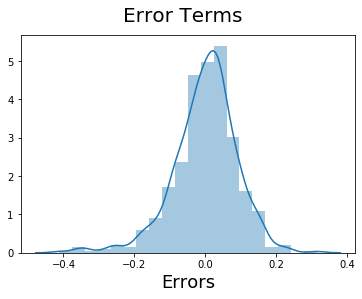

In [929]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

### Applying the scaling on the test sets

In [930]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [931]:
y_test = df_test.pop('cnt')
X_test = df_test

In [932]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [933]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

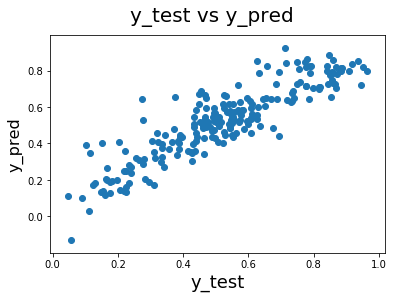

In [934]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### R square and R mean Square Testing

In [935]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7961390438459766

In [936]:
r2_score(y_train,y_train_count)

0.8352749595695671

### MSE of train and test variables

In [937]:
from sklearn.metrics import mean_squared_error 
print('MSE for train is', mean_squared_error(y_test, y_pred))

MSE for train is 0.00974746473820747


In [938]:
print('MSE for train is', mean_squared_error(y_train, y_train_count))

MSE for train is 0.008280063298015205


### Testing Linear Regression assumptions

mean -0.0
sum -0.0


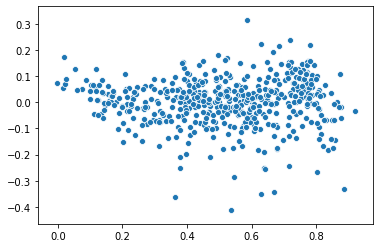

In [939]:
residuals = y_train - y_train_count
print('mean',round(residuals.mean(),4))
print('sum',round(residuals.sum(), 4))
sns.scatterplot(x = y_train_count, y = residuals)
plt.show()

### Above plot shows error values are independent to each other

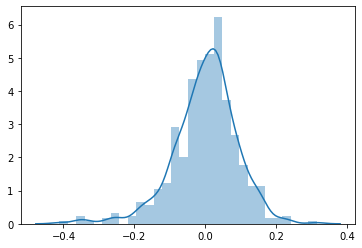

In [940]:
sns.distplot(residuals)
plt.show()

### Errors are seen normally distributed

In [941]:
# visualizing the y train original and y train predicted values
dataf1 = pd.DataFrame({'y_train':y_train, 'y_train_predicted':y_train_count})
dataf1.head(15)

,y_train,y_train_predicted
576,0.827658,0.771441
426,0.465255,0.499266
728,0.204096,0.340012
482,0.482973,0.572570
111,0.191095,0.270763
580,0.782559,0.806932
500,0.851588,0.821849
479,0.710308,0.713459
472,0.499885,0.607912
455,0.692476,0.524647


In [942]:
# visualizing the y_test original and y_test_predicted predicted values
dataf2 = pd.DataFrame({'y_test':y_test, 'y_test_predicted':y_pred})
dataf2.head(15)

,y_test,y_test_predicted
184,0.692706,0.439308
535,0.712034,0.924675
299,0.303382,0.411415
221,0.547400,0.563224
152,0.569029,0.585737
404,0.438104,0.454700
198,0.510354,0.544333
171,0.553728,0.434143
512,0.692706,0.792998
200,0.495858,0.593207


Text(0.5, 0, 'Errors')

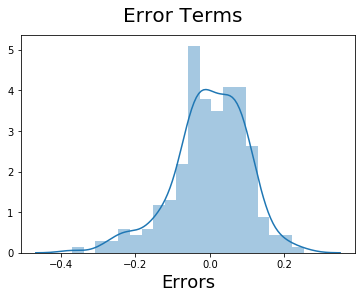

In [943]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

mean -0.0004
sum -0.0924


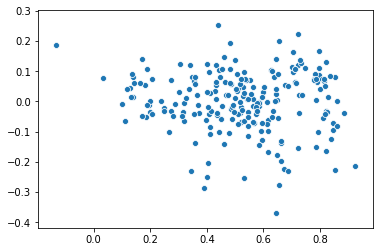

In [944]:
residuals_test = y_test - y_pred
print('mean',round(residuals_test.mean(),4))
print('sum',round(residuals_test.sum(), 4))
sns.scatterplot(x = y_pred, y = residuals_test)
plt.show()

#### In light of above plots, it's seen that error terms are normally distributed and independent of each other